In [2]:
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import mglearn.datasets
from mglearn.plots import plot_2d_separator
from mglearn import discrete_scatter
import numpy as np
import pandas as pd

d:\projects\introtomlwpython\knn\breastcancer\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Forge dataset classification, experiment:
KNN, k = 3
Test set prediction [1 0 1 0 1 0 0]
Test set accuracy 0.86


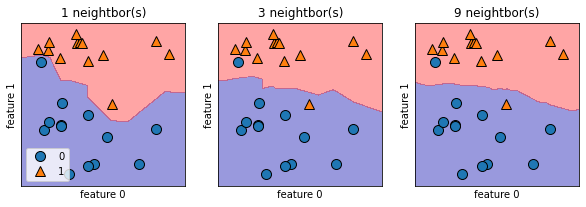

In [13]:
%matplotlib inline
# Visualize the KNN boundaries for the forge dataset
# forge dataset, toy set
Xforge, yforge = mglearn.datasets.make_forge()
Xforge_train, Xforge_test, yforge_train, yforge_test = train_test_split(Xforge, yforge, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Xforge_train, yforge_train)

print('Forge dataset classification, experiment:')
print('KNN, k = 3')
print("Test set prediction {}".format(clf.predict(Xforge_test)))
print("Test set accuracy {:.2f}".format(clf.score(Xforge_test, yforge_test)))

# lets visualize the decision boundary of this KNN classifier
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(Xforge, yforge)
    plot_2d_separator(clf, Xforge, fill=True, eps=0.5, ax=ax, alpha=.4)
    discrete_scatter(Xforge[:, 0], Xforge[:, 1], yforge, ax=ax)
    ax.set_title("{} neightbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show(fig)

# this boundary shows how the prediction descisions can change with more neighbors, as k increases the boundary smoothens out. 
# "A smoother corresponds to a simpler model." Using fewer neightbors corresponds to a coresponds to a more complex model,
# and vice versa.

# Considering a model where k is the size of the dataset, every point would have the same neightbors and the class that is most
# frequent would always be the prediction.

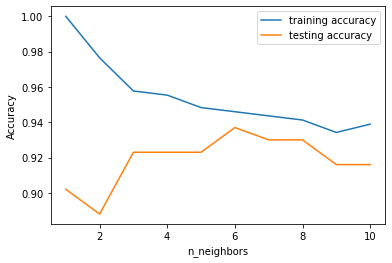

In [12]:
%matplotlib inline
cancer = load_breast_cancer()
Xcancer_train, Xcancer_test, ycancer_train, ycancer_test = train_test_split(cancer.data, cancer.target,
                                                                                stratify=cancer.target, random_state=66)
training_accuracy, testing_accuracy = [], []

for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xcancer_train, ycancer_train)
    training_accuracy.append(clf.score(Xcancer_train, ycancer_train))
    testing_accuracy.append(clf.score(Xcancer_test, ycancer_test))
    
plt.plot(range(1,11), training_accuracy, label="training accuracy")
plt.plot(range(1,11), testing_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# Overfitting can be see in neightbors > 8
# Underfitting can be see in neighbors < 6
# n_neighbors = 1, perfect training set, 2nd worst testing set